In [10]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [11]:
# Set work data Type
T = BigFloat
setprecision(128)
;

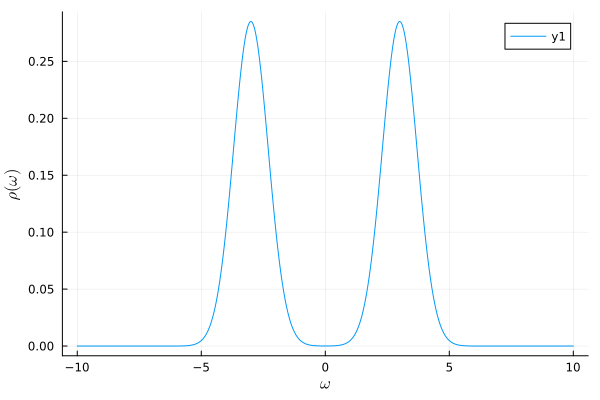

In [12]:
#define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
rho(omega) = 0.5*gaussian(omega, -3.0, 0.7) + 0.5*gaussian(omega, 3.0, 0.7)
omegas = LinRange(-10, 10, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [13]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+5
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [14]:
beta = 100. #inverse temperature
#10で成功
input_smpl, input_gw = generate_input_data(rho, beta)
;

LoadError: InterruptException:

In [28]:
cutoff = 28
test_smpl = input_smpl[1:cutoff]
test_gw = input_gw[1:cutoff]
;

In [16]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
#ini_iter_tol  = 5000  #upper bound of iteration
;

In [31]:
#construct solver struct
#@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
#@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true,ini_tol=pick_iter_tol)
@time sol = Nevanlinna.NevanlinnaSolver(test_smpl, test_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 28
H=1
Iter     Function value   Gradient norm 
     0     7.230248e+00     1.003250e+01
 * time: 0.016579866409301758
     1     5.316699e+00     6.728146e+00
 * time: 1.4344680309295654
     2     2.806421e+00     5.571746e+01
 * time: 2.123208999633789
     3     2.766101e+00     4.988991e+01
 * time: 2.570457935333252
     4     2.673246e+00     3.711444e+01
 * time: 2.967993974685669
     5     2.205274e+00     2.928713e+01
 * time: 3.6009938716888428
     6     2.201644e+00     2.469303e+01
 * time: 4.241678953170776
     7     2.190567e+00     3.287190e+01
 * time: 4.63243293762207
     8     2.178798e+00     2.255714e+01
 * time: 5.253481864929199
     9     2.157452e+00     5.275094e+01
 * time: 5.951023101806641
    10     2.133326e+00     2.057269e+01
 * time: 6.84109091758728
    11     2.102997e+00     3.328068e+01
 * time: 7.053752899169922
    12     2.094197e+00     1.711016e+01
 * time: 7.787118911743164
    13     2.084800e+00     2.100825e+01
 * t

   119     9.809772e-01     8.956284e+00
 * time: 34.71807909011841
   120     9.809661e-01     2.101595e+00
 * time: 34.87406301498413
   121     9.809265e-01     1.636870e+01
 * time: 35.191678047180176
   122     9.808905e-01     2.110991e+00
 * time: 35.30011796951294
   123     9.808729e-01     1.124049e+01
 * time: 35.56085705757141
   124     9.808558e-01     2.082622e+00
 * time: 35.6780309677124
   125     9.803203e-01     2.808996e+01
 * time: 36.115527868270874
   126     9.802247e-01     2.053171e+00
 * time: 36.46321702003479
   127     9.798433e-01     2.052482e+00
 * time: 36.73231291770935
   128     9.798254e-01     2.970254e+00
 * time: 37.16651201248169
   129     9.798243e-01     2.243368e+00
 * time: 37.38467288017273
   130     9.798215e-01     4.231767e+00
 * time: 37.630155086517334
   131     9.798179e-01     2.640544e+00
 * time: 37.831746101379395
   132     9.798135e-01     4.544789e+00
 * time: 38.00122404098511
   133     9.798090e-01     2.772439e+00
 * t

   240     9.789701e-01     2.961191e+00
 * time: 55.51211190223694
   241     9.789682e-01     2.700001e+00
 * time: 55.65478992462158
   242     9.789664e-01     2.950940e+00
 * time: 55.80465888977051
   243     9.789645e-01     2.691924e+00
 * time: 55.966033935546875
   244     9.789627e-01     2.963023e+00
 * time: 56.07747793197632
   245     9.789608e-01     2.700845e+00
 * time: 56.230369091033936
   246     9.789589e-01     2.991826e+00
 * time: 56.38950300216675
   247     9.789570e-01     2.715111e+00
 * time: 56.55508899688721
   248     9.789550e-01     3.024308e+00
 * time: 56.71005606651306
   249     9.789530e-01     2.722721e+00
 * time: 56.85290288925171
   250     9.789510e-01     3.049317e+00
 * time: 56.97284197807312
   251     9.789490e-01     2.717338e+00
 * time: 57.12107992172241
   252     9.789470e-01     3.061937e+00
 * time: 57.26662802696228
   253     9.789449e-01     2.699108e+00
 * time: 57.42353010177612
   254     9.789429e-01     3.063541e+00
 * ti

   361     9.763570e-01     2.107721e+00
 * time: 78.20565986633301
   362     9.763543e-01     4.721723e+00
 * time: 78.35701608657837
   363     9.763516e-01     2.117296e+00
 * time: 78.46770405769348
   364     9.763488e-01     4.650025e+00
 * time: 78.61776208877563
   365     9.763462e-01     2.095506e+00
 * time: 78.77058506011963
   366     9.763437e-01     4.558582e+00
 * time: 78.9316759109497
   367     9.763412e-01     2.081442e+00
 * time: 79.09327387809753
   368     9.763385e-01     4.800132e+00
 * time: 79.24325704574585
   369     9.763358e-01     2.080958e+00
 * time: 79.36746788024902
   370     9.763327e-01     5.121761e+00
 * time: 79.51540994644165
   371     9.763296e-01     2.068925e+00
 * time: 79.6633780002594
   372     9.763262e-01     5.301279e+00
 * time: 79.81585001945496
   373     9.763230e-01     2.041594e+00
 * time: 79.97649693489075
   374     9.763195e-01     5.502921e+00
 * time: 80.12867093086243
   375     9.763161e-01     2.014668e+00
 * time: 

   482     9.724465e-01     1.780719e+00
 * time: 100.89040493965149
   483     9.724445e-01     4.590343e+00
 * time: 101.10828590393066
   484     9.724428e-01     1.838838e+00
 * time: 101.27087306976318
   485     9.724413e-01     3.591933e+00
 * time: 101.42417287826538
   486     9.724402e-01     1.870408e+00
 * time: 101.56971907615662
   487     9.724390e-01     3.712587e+00
 * time: 101.76816606521606
   488     9.724378e-01     1.912691e+00
 * time: 101.92190289497375
   489     9.724361e-01     4.372810e+00
 * time: 102.09373593330383
   490     9.724343e-01     1.956727e+00
 * time: 102.21560788154602
   491     9.724324e-01     4.396568e+00
 * time: 102.43906593322754
   492     9.724306e-01     1.961422e+00
 * time: 102.64536690711975
   493     9.724289e-01     4.038572e+00
 * time: 102.83128905296326
   494     9.724274e-01     1.949456e+00
 * time: 103.00244808197021
   495     9.724260e-01     3.848777e+00
 * time: 103.16557788848877
   496     9.724246e-01     1.9521

    12     4.161443e+00     5.866055e-02
 * time: 3.300873041152954
    13     4.115128e+00     5.184976e-02
 * time: 3.786562919616699
    14     4.038005e+00     4.844748e-02
 * time: 4.533105850219727
    15     4.030682e+00     3.879683e-02
 * time: 4.8156468868255615
    16     4.027822e+00     2.874333e-02
 * time: 4.997644901275635
    17     4.024091e+00     2.063243e-02
 * time: 5.187108993530273
    18     4.020501e+00     2.624522e-02
 * time: 5.551322937011719
    19     4.013272e+00     1.962015e-02
 * time: 5.8117430210113525
    20     4.010940e+00     1.793949e-02
 * time: 6.473353862762451
    21     4.010242e+00     1.831759e-02
 * time: 6.731703996658325
    22     4.009528e+00     1.729084e-02
 * time: 6.9151928424835205
    23     4.008579e+00     3.576512e-02
 * time: 7.200525999069214
    24     4.008341e+00     3.028358e-02
 * time: 7.339076042175293
    25     4.003154e+00     1.275968e-02
 * time: 7.7214579582214355
    26     3.999560e+00     1.065331e-02
 * 

   132     3.985373e+00     2.078869e-02
 * time: 53.050957918167114
   133     3.985370e+00     4.127950e-02
 * time: 53.59553098678589
   134     3.985367e+00     2.483206e-02
 * time: 54.39959788322449
   135     3.985348e+00     1.105538e-01
 * time: 55.746201038360596
   136     3.985343e+00     2.230670e-02
 * time: 57.62022805213928
   137     3.985336e+00     6.552062e-02
 * time: 59.271241903305054
   138     3.985333e+00     1.564729e-02
 * time: 61.239935874938965
   139     3.985329e+00     1.123612e-01
 * time: 63.32016205787659
   140     3.985325e+00     3.932713e-02
 * time: 65.60583305358887
   141     3.985322e+00     6.061804e-02
 * time: 67.68118500709534
   142     3.985322e+00     5.103425e-02
 * time: 69.77641797065735
   143     3.985320e+00     3.092375e-02
 * time: 71.79084587097168
   144     3.984185e+00     4.119146e-02
 * time: 73.68008804321289
   145     3.983622e+00     4.496898e-02
 * time: 78.57390284538269
   146     3.983617e+00     4.429450e-02
 * 

   252     3.982763e+00     3.967432e-03
 * time: 128.77597188949585
   253     3.982762e+00     9.049365e-03
 * time: 128.968337059021
   254     3.982762e+00     3.938466e-03
 * time: 129.15399384498596
   255     3.982762e+00     9.258413e-03
 * time: 129.3341028690338
   256     3.982761e+00     3.950071e-03
 * time: 129.52052998542786
   257     3.982761e+00     9.463187e-03
 * time: 129.70850801467896
   258     3.982760e+00     4.005187e-03
 * time: 129.89912700653076
   259     3.982760e+00     9.656070e-03
 * time: 130.09427285194397
   260     3.982760e+00     4.108566e-03
 * time: 130.2825129032135
   261     3.982759e+00     9.828148e-03
 * time: 130.47095489501953
   262     3.982759e+00     4.267710e-03
 * time: 130.66815400123596
   263     3.982758e+00     9.969977e-03
 * time: 130.8565239906311
   264     3.982758e+00     4.493332e-03
 * time: 131.03866505622864
   265     3.982757e+00     1.007230e-02
 * time: 131.19330596923828
   266     3.982757e+00     4.798003e-0

   372     3.982044e+00     4.679203e-02
 * time: 155.56818795204163
   373     3.982025e+00     3.623924e-02
 * time: 155.90668892860413
   374     3.982012e+00     3.271380e-02
 * time: 156.16877102851868
   375     3.982001e+00     4.347976e-02
 * time: 156.83416390419006
   376     3.981991e+00     3.559435e-02
 * time: 157.18260884284973
   377     3.981959e+00     5.375666e-02
 * time: 157.68905591964722
   378     3.981920e+00     3.386333e-02
 * time: 158.41635298728943
   379     3.981853e+00     3.843398e-02
 * time: 158.67434096336365
   380     3.981851e+00     3.472714e-02
 * time: 158.95019793510437
   381     3.981848e+00     2.869922e-02
 * time: 159.44045090675354
   382     3.981846e+00     3.042455e-02
 * time: 159.69953989982605
   383     3.981842e+00     4.241864e-02
 * time: 160.2364559173584
   384     3.981838e+00     3.180558e-02
 * time: 160.4716238975525
   385     3.981804e+00     3.743618e-02
 * time: 161.08749198913574
   386     3.981802e+00     3.116465

   492     3.981061e+00     2.866249e-03
 * time: 185.10149097442627
   493     3.981061e+00     4.011380e-03
 * time: 185.2956268787384
   494     3.981061e+00     2.842281e-03
 * time: 185.4809639453888
   495     3.981061e+00     3.922982e-03
 * time: 185.66729998588562
   496     3.981061e+00     2.815898e-03
 * time: 185.8502700328827
   497     3.981061e+00     3.830309e-03
 * time: 186.03049397468567
   498     3.981061e+00     2.788419e-03
 * time: 186.21261286735535
   499     3.981061e+00     3.738316e-03
 * time: 186.40678787231445
   500     3.981061e+00     2.760992e-03
 * time: 186.597069978714
Faild to optimize!
max_theta=2.738143890902318539833127801830592715015
hardy optimization was failure.
H=4
Iter     Function value   Gradient norm 
     0     7.230248e+00     1.234881e+01
 * time: 5.793571472167969e-5
     1     6.854876e+00     1.609320e-01
 * time: 0.4173281192779541
     2     6.467145e+00     7.205138e-02
 * time: 0.95284104347229
     3     6.103695e+00     4

   109     3.738438e+00     2.350534e-02
 * time: 39.717775106430054
   110     3.738119e+00     2.222994e-02
 * time: 39.91613292694092
   111     3.737831e+00     2.320417e-02
 * time: 40.125608921051025
   112     3.737492e+00     2.151707e-02
 * time: 40.451184034347534
   113     3.737244e+00     2.151961e-02
 * time: 40.65302109718323
   114     3.736585e+00     2.109086e-02
 * time: 40.933444023132324
   115     3.736338e+00     2.245465e-02
 * time: 41.131810903549194
   116     3.735824e+00     1.929738e-02
 * time: 41.34275197982788
   117     3.735272e+00     1.778981e-02
 * time: 41.55302906036377
   118     3.734509e+00     2.568088e-02
 * time: 41.768139123916626
   119     3.733765e+00     2.653694e-02
 * time: 41.96999406814575
   120     3.732817e+00     2.927481e-02
 * time: 42.169650077819824
   121     3.730472e+00     2.705281e-02
 * time: 42.496140003204346
   122     3.727854e+00     2.957813e-02
 * time: 42.91381311416626
   123     3.726269e+00     2.910651e-02

   230     3.585007e+00     3.095155e-02
 * time: 73.1535210609436
   231     3.583653e+00     2.771191e-02
 * time: 73.35236692428589
   232     3.583122e+00     3.037275e-02
 * time: 73.5568540096283
   233     3.581939e+00     4.653966e-02
 * time: 73.75427007675171
   234     3.580743e+00     3.566962e-02
 * time: 73.95853805541992
   235     3.579176e+00     5.248036e-02
 * time: 74.17806196212769
   236     3.577652e+00     4.025712e-02
 * time: 74.38395595550537
   237     3.576162e+00     5.327744e-02
 * time: 74.57749795913696
   238     3.574252e+00     4.290382e-02
 * time: 74.85379004478455
   239     3.573078e+00     5.158595e-02
 * time: 75.05113005638123
   240     3.571231e+00     4.847660e-02
 * time: 75.37153792381287
   241     3.569297e+00     5.302021e-02
 * time: 75.57857990264893
   242     3.568455e+00     4.739156e-02
 * time: 75.77265000343323
   243     3.566476e+00     4.855528e-02
 * time: 76.04869103431702
   244     3.563937e+00     3.683040e-02
 * time: 

   351     3.545658e+00     1.538423e-05
 * time: 102.88077902793884
   352     3.545658e+00     1.595774e-05
 * time: 103.08584308624268
   353     3.545658e+00     1.592361e-05
 * time: 103.28372597694397
   354     3.545658e+00     1.676541e-05
 * time: 103.48692107200623
   355     3.545658e+00     1.651421e-05
 * time: 103.68702292442322
   356     3.545658e+00     1.756667e-05
 * time: 103.88787698745728
   357     3.545658e+00     1.739635e-05
 * time: 104.09617495536804
   358     3.545658e+00     1.839804e-05
 * time: 104.30388808250427
   359     3.545658e+00     1.832490e-05
 * time: 104.51786208152771
   360     3.545658e+00     1.928879e-05
 * time: 104.72821998596191
   361     3.545658e+00     1.926814e-05
 * time: 104.92936491966248
   362     3.545658e+00     2.024824e-05
 * time: 105.13448190689087
   363     3.545658e+00     2.022661e-05
 * time: 105.3318099975586
   364     3.545658e+00     2.126497e-05
 * time: 105.52743911743164
   365     3.545658e+00     2.12045

   471     3.545658e+00     9.033937e-05
 * time: 128.30842900276184
   472     3.545658e+00     9.163781e-05
 * time: 128.529452085495
   473     3.545658e+00     9.200526e-05
 * time: 128.73897409439087
   474     3.545658e+00     9.329316e-05
 * time: 128.94435596466064
   475     3.545658e+00     9.368191e-05
 * time: 129.22109699249268
   476     3.545658e+00     9.496427e-05
 * time: 129.47429394721985
   477     3.545658e+00     9.537128e-05
 * time: 129.68456506729126
   478     3.545658e+00     9.665587e-05
 * time: 129.89621901512146
   479     3.545658e+00     9.707580e-05
 * time: 130.14701199531555
   480     3.545658e+00     9.837227e-05
 * time: 130.34839701652527
   481     3.545658e+00     9.879806e-05
 * time: 130.5523021221161
   482     3.545658e+00     1.001168e-04
 * time: 130.75112295150757
   483     3.545658e+00     1.005404e-04
 * time: 130.9498200416565
   484     3.545658e+00     1.018910e-04
 * time: 131.15121006965637
   485     3.545658e+00     1.023046e-

    88     1.716459e-03     2.228900e-05
 * time: 29.361634969711304
    89     1.716455e-03     6.620322e-05
 * time: 29.6807599067688
    90     1.716453e-03     3.172018e-05
 * time: 30.03149700164795
    91     1.716450e-03     3.459378e-05
 * time: 30.34245491027832
    92     1.716449e-03     2.224919e-05
 * time: 30.563392877578735
    93     1.716447e-03     3.465388e-05
 * time: 30.909154891967773
    94     1.716447e-03     2.709402e-05
 * time: 31.115439891815186
    95     1.716446e-03     3.326435e-05
 * time: 31.4616219997406
    96     1.716446e-03     2.690796e-05
 * time: 31.70510196685791
    97     1.716446e-03     2.579151e-05
 * time: 32.03925704956055
    98     1.716446e-03     2.238588e-05
 * time: 32.28812384605408
    99     1.716446e-03     2.134904e-05
 * time: 32.593230962753296
   100     1.716446e-03     2.020349e-05
 * time: 32.82097792625427
   101     1.716445e-03     2.026330e-05
 * time: 33.1948459148407
   102     1.716445e-03     1.871907e-05
 * ti

   209     1.716400e-03     2.826691e-05
 * time: 60.596226930618286
   210     1.716400e-03     1.949035e-05
 * time: 60.82193183898926
   211     1.716400e-03     2.969989e-05
 * time: 61.07709789276123
   212     1.716400e-03     1.914744e-05
 * time: 61.29016900062561
   213     1.716400e-03     3.155583e-05
 * time: 61.50529098510742
   214     1.716400e-03     1.889565e-05
 * time: 61.7186758518219
   215     1.716400e-03     3.385980e-05
 * time: 61.939350843429565
   216     1.716400e-03     1.850525e-05
 * time: 62.1466588973999
   217     1.716399e-03     3.746450e-05
 * time: 62.358824014663696
   218     1.716399e-03     1.784749e-05
 * time: 62.577178955078125
   219     1.716399e-03     4.749472e-05
 * time: 62.797510862350464
   220     1.716399e-03     1.716707e-05
 * time: 63.025635957717896
   221     1.716396e-03     1.449866e-04
 * time: 63.370311975479126
   222     1.716395e-03     2.447715e-05
 * time: 63.81496500968933
   223     1.716394e-03     2.321316e-05
 *

   330     1.716368e-03     7.839052e-05
 * time: 91.39649295806885
   331     1.716368e-03     1.775187e-05
 * time: 91.66071796417236
   332     1.716367e-03     7.357436e-05
 * time: 91.94422602653503
   333     1.716367e-03     1.735757e-05
 * time: 92.18213295936584
   334     1.716366e-03     7.112912e-05
 * time: 92.39959192276001
   335     1.716366e-03     1.727840e-05
 * time: 92.62175488471985
   336     1.716366e-03     8.561374e-05
 * time: 92.95713591575623
   337     1.716365e-03     1.769624e-05
 * time: 93.17957901954651
   338     1.716365e-03     7.965781e-05
 * time: 93.39597392082214
   339     1.716364e-03     1.727091e-05
 * time: 93.61222887039185
   340     1.716364e-03     7.297809e-05
 * time: 93.82749700546265
   341     1.716363e-03     1.766815e-05
 * time: 94.04331684112549
   342     1.716363e-03     6.499745e-05
 * time: 94.29314589500427
   343     1.716363e-03     1.741968e-05
 * time: 94.5020809173584
   344     1.716362e-03     9.899219e-05
 * time:

   450     1.716326e-03     2.931455e-05
 * time: 122.65817189216614
   451     1.716326e-03     1.981545e-05
 * time: 122.90147995948792
   452     1.716326e-03     2.896346e-05
 * time: 123.12270498275757
   453     1.716326e-03     1.952076e-05
 * time: 123.35625886917114
   454     1.716326e-03     2.922052e-05
 * time: 123.57627201080322
   455     1.716326e-03     1.929903e-05
 * time: 123.79926204681396
   456     1.716326e-03     3.022397e-05
 * time: 124.01661586761475
   457     1.716326e-03     1.924758e-05
 * time: 124.23142504692078
   458     1.716326e-03     3.182731e-05
 * time: 124.45762300491333
   459     1.716326e-03     1.899681e-05
 * time: 124.72420597076416
   460     1.716326e-03     3.392836e-05
 * time: 124.96245694160461
   461     1.716326e-03     1.853914e-05
 * time: 125.183424949646
   462     1.716325e-03     3.692020e-05
 * time: 125.4133288860321
   463     1.716325e-03     1.794704e-05
 * time: 125.6492829322815
   464     1.716325e-03     4.222554e-

LoadError: InterruptException:

In [18]:
#execute optimize
@time Nevanlinna.solve!(sol)

LoadError: UndefVarError: sol not defined

In [29]:
wo_sol = Nevanlinna.NevanlinnaSolver(test_smpl, test_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
#wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 28


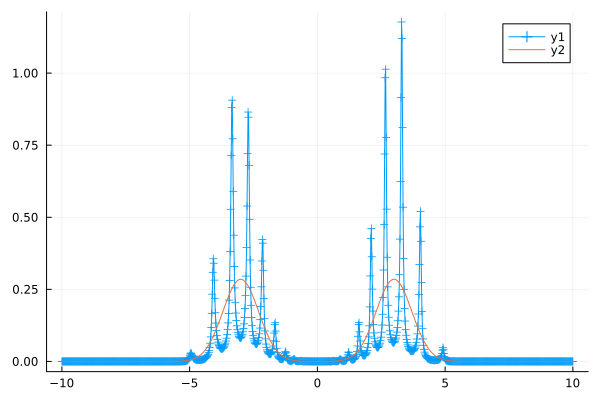

In [30]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi,marker=:+)
#plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [21]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")

LoadError: UndefVarError: sol not defined